<h1>Logistic Regression</h1>

Logistic Regression ist ein Supervised Learning Methode, basierend auf der Sigmoid Funktion.


>Sigmoid Funktion:
>
$$
f(x) = \frac{1}{1 + e^{-x} }\
$$

Bei Eingaben liefert diese Funktion einen Wert zwischen 0 und 1.

Bei Klassifizierungen ist der höchste Wert (z.B. 0.87) ein Indikator für die zutreffende Klasse. Bei der binären Klassifikation kann jeder Wert, der höher als 0.5 ist, als positiv markiert werden. 

Die Sigmoidfunktion wird auch als Aktivierungsfunktion am Ende eines Netzes genutzt. 

In [57]:
import math

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix
from scipy.interpolate       import interp1d
import seaborn as sn

In [58]:
# In Python Code:
def sigmoid_funk(x:float):
    return 1 / (1 + math.exp(-x))

In [59]:
sigmoid_funk(5)

0.9933071490757153

In [60]:
# Input X.
array_input = np.arange(-10, 10, 1)
array_input

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [61]:
# Output Y.
calc = list(map(lambda x: sigmoid_funk(x), array_input))
calc

[4.5397868702434395e-05,
 0.00012339457598623172,
 0.0003353501304664781,
 0.0009110511944006454,
 0.0024726231566347743,
 0.0066928509242848554,
 0.01798620996209156,
 0.04742587317756678,
 0.11920292202211755,
 0.2689414213699951,
 0.5,
 0.7310585786300049,
 0.8807970779778823,
 0.9525741268224334,
 0.9820137900379085,
 0.9933071490757153,
 0.9975273768433653,
 0.9990889488055994,
 0.9996646498695336,
 0.9998766054240137]

Das ganze können wir gut visualisieren.

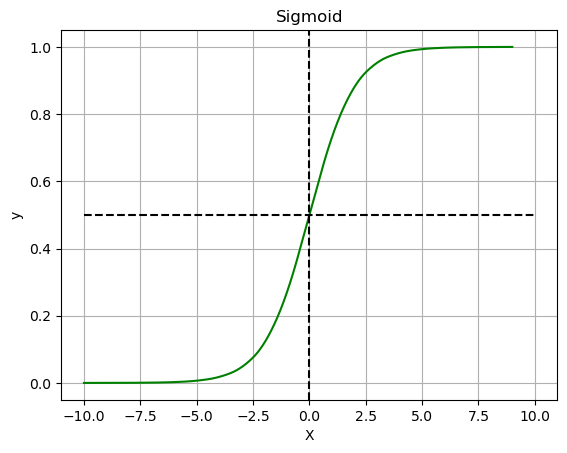

In [75]:
# Erstelle Plot für Sigmoidfunktion.
intp = interp1d(x=array_input, y=calc, kind=2)
x2 = np.linspace(start=array_input[0], stop=array_input[len(array_input)-1], num=2000)
y2 = intp(x2)
plt.title("Sigmoid")
plt.xlabel("X")
plt.ylabel('y')
plt.grid()
plt.plot(x2, y2, color='green' )
plt.axvline(x = 0, color = 'black', linestyle='--')
plt.hlines(y = 0.5, color = 'black', linestyle='--', xmin=-10, xmax=10)


Man sieht deutlich je weiter der X-Wert von der 0 Weg ist, desto kleiner wird der y-Wert.


Bei einem linearen Model wird eine Gerade mit mx+b in die Sigmoid-Funktion eingegeben, um dann ein Ergebnis zu bekommen

>Sigmoid Funktion mit Gerade:
>
$$
f(x) = \frac{1}{1 + e^{-(m * x + b)} }\
$$

Für die Überschaubarkeit nehmen wir ein kleines einfaches Dataset. 

In [76]:
df_data = pd.read_csv('./files_data/data/insurance_data.csv')
df_data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


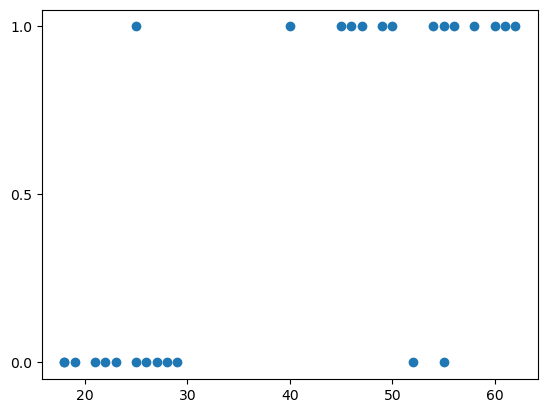

In [77]:
plt.yticks([0, 0.5, 1])
plt.scatter(df_data['age'], df_data['bought_insurance'])

Erstelle Model und hole die Gerade.

In [78]:
model = LogisticRegression()
model.fit(df_data['age'].to_numpy().reshape(-1, 1), df_data['bought_insurance'])

LogisticRegression()

In [69]:
# y = mx + b
m, b = model.coef_, model.intercept_
m, b 

(array([[0.1354656]]), array([-5.26279696]))

In [79]:
def lin_funk(x):
    return (0.1354656 * x) -5.26279696

Lineare Funktion mit Sigmoid.:

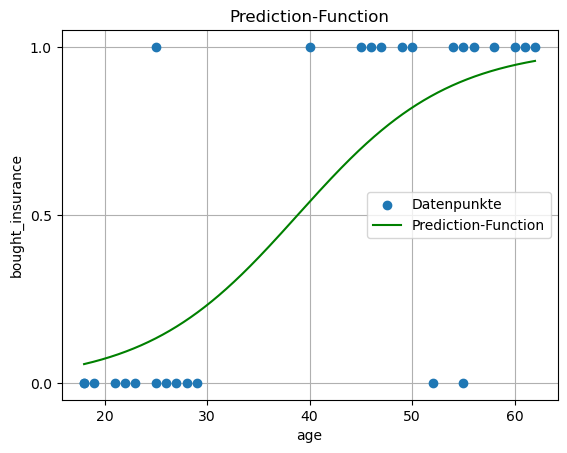

In [98]:
plt.title("Prediction-Function")
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.yticks([0, 0.5, 1])
plt.scatter(df_data['age'], df_data['bought_insurance'], zorder=2, label='Datenpunkte')
# Sigmoid + lineare Funktion:
X = df_data['age'].to_numpy()
X = np.linspace(start=min(X), stop=max(X), num=2000)
y = [sigmoid_funk ( lin_funk( i ) )  for i  in X]
plt.plot(X, y, label='Prediction-Function', color="green")
plt.grid(zorder=1)
plt.legend()

Daraus können wir einfach eine Funktion für die Predictions erstellen. 


In [89]:
def predict(x:int):
    f_a = (0.1354656 * x) -5.26279696
    f_x = (1 / (1 + math.exp(-f_a)) )
    return f_x

print("keine Versicherung:", (model.predict([ [22] ]), predict(22)) ) 
print("Versicherung:",(model.predict([ [68] ]), predict(68)))

keine Versicherung: (array([0], dtype=int64), 0.0925781948635542)
Versicherung: (array([1], dtype=int64), 0.9810879688527779)


Mit dieser Funktion können kommende Werte gut vorhergesagt werden, je älter eine Person ist, desto wahrscheinlicher das diese eine Versicherung kauft.
- Das Model leitet direkt 0 oder 1 ab, basierend auf den Wert.
- Der eigentliche Wert kann auch ausgegeben werden.

In [100]:
(model.predict_proba([ [22] ]), model.predict_proba([ [68] ]))

(array([[0.90742181, 0.09257819]]), array([[0.01891203, 0.98108797]]))

Als Anwendungsbeispiel wollen wir klassifizieren, ob eine Person Diabetes hat oder nicht.

Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database [Letzter Zugriff: 10.06.2024]
>Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

In [147]:
# Lade Daten in ein Dataframe.
data_df = pd.read_csv('./files_data/data/PimaIndiansDiabetesDatabase.zip', compression='zip')
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [148]:
data_df.shape

(768, 9)

In [149]:
data_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [150]:
# Erstelle Train- und Testset.
X_train, X_test, y_train, y_test = train_test_split(\
    data_df.drop('Outcome', axis="columns"), data_df['Outcome'], test_size=0.25 )

In [151]:
# Erstelle Model und berechne Score.
# Es gibt einige Parameter die eingestelt werden können. 
# - penalty= Regulierung L1, L2 und beides (Elastic Net ), und einige mehr
# Für die Vorführung werden die Standardparameter genutzt.
model = LogisticRegression(max_iter=1200)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.75

In [152]:
X_test.iloc[0]

Pregnancies                   8.000
Glucose                     154.000
BloodPressure                78.000
SkinThickness                32.000
Insulin                       0.000
BMI                          32.400
DiabetesPedigreeFunction      0.443
Age                          45.000
Name: 754, dtype: float64

In [153]:
model.predict([X_test.iloc[0]])

C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [154]:
# Ausgabe der Wahrscheinlichkeit das es Zutrifft. 
# - Ausgabe als Array: ( Flase | True )
model.predict_proba([X_test.iloc[0]])

C:\Users\Alexander\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.25068902, 0.74931098]])